In [24]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
style.use('ggplot')

start = datetime(2011, 1, 1)
end = datetime(2021, 1, 1)
'''
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
'''
df = pd.read_csv('tsla.csv', index_col=0).reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,5.400,5.180,5.368,5.324,6415000.0,5.324
1,2011-01-04,5.390,5.204,5.332,5.334,5937000.0,5.334
2,2011-01-05,5.380,5.238,5.296,5.366,7233500.0,5.366
3,2011-01-06,5.600,5.362,5.366,5.576,10306000.0,5.576
4,2011-01-07,5.716,5.580,5.600,5.648,11239500.0,5.648


In [2]:
df = pd.DataFrame(df[['Date','Adj Close']])
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Adj Close
0,2011-01-03,5.324
1,2011-01-04,5.334
2,2011-01-05,5.366
3,2011-01-06,5.576
4,2011-01-07,5.648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2517 non-null   datetime64[ns]
 1   Adj Close  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [4]:
df.set_index('Date', inplace=True)

In [5]:
df['2015'].head()

,Adj Close
Date,
2015-01-02,43.862000
2015-01-05,42.018002
2015-01-06,42.256001
2015-01-07,42.189999
2015-01-08,42.124001


In [6]:
date_range = df.index.max()-df.index.min()
print(date_range)

3650 days 00:00:00


In [7]:
new_index = pd.date_range(df.index.min(),df.index.max())
df = df.reindex(new_index)

In [8]:
df['Adj Close'].value_counts(dropna=False)

NaN          1134
5.484000        4
6.492000        3
5.634000        3
5.514000        3
             ... 
42.282001       1
69.050003       1
61.742001       1
40.448002       1
41.798000       1
Name: Adj Close, Length: 2354, dtype: int64

In [9]:
df['Adj Close'].interpolate(method='linear', inplace=True)

In [10]:
df['Adj Close'].value_counts(dropna=False)


5.484000     4
43.916000    3
6.132000     3
42.018002    3
5.664000     3
            ..
20.168667    1
52.082001    1
71.123334    1
41.792000    1
6.750000     1
Name: Adj Close, Length: 3476, dtype: int64

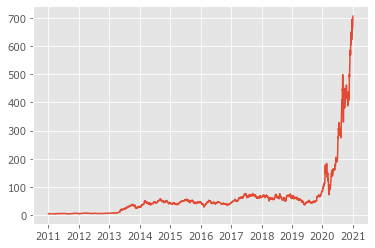

In [11]:
plt.plot(df)

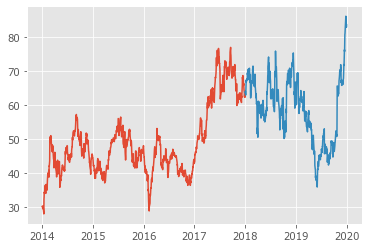

In [12]:
train_data = df['2014':'2017']
test_data = df['2018':'2019']

plt.plot(train_data)
plt.plot(test_data)

In [13]:
scaler = MinMaxScaler(feature_range=(-1,1))
train_data_scaled = scaler.fit_transform(train_data)

In [15]:
train_data_scaled

array([[-0.91105591],
       [-0.91239923],
       [-0.91679555],
       ...,
       [ 0.4003908 ],
       [ 0.41907519],
       [ 0.43775957]])

In [18]:
train_data_scaled = torch.FloatTensor(train_data_scaled).view(-1)

In [19]:
train_data_scaled

tensor([-0.9111, -0.9124, -0.9168,  ...,  0.4004,  0.4191,  0.4378])

In [20]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [21]:
train_window = 30
train_inout_seq = create_inout_sequences(train_data_scaled, train_window)

In [22]:
train_inout_seq[:5]

[(tensor([-0.9111, -0.9124, -0.9168, -0.9237, -0.9307, -0.9376, -0.9184, -0.9028,
          -0.9333, -0.9481, -0.9654, -0.9827, -1.0000, -0.8215, -0.7982, -0.7425,
          -0.7503, -0.7367, -0.7232, -0.7096, -0.6960, -0.6807, -0.6568, -0.7129,
          -0.7265, -0.7400, -0.7535, -0.6822, -0.7078, -0.6459]),
  tensor([-0.6575])),
 (tensor([-0.9124, -0.9168, -0.9237, -0.9307, -0.9376, -0.9184, -0.9028, -0.9333,
          -0.9481, -0.9654, -0.9827, -1.0000, -0.8215, -0.7982, -0.7425, -0.7503,
          -0.7367, -0.7232, -0.7096, -0.6960, -0.6807, -0.6568, -0.7129, -0.7265,
          -0.7400, -0.7535, -0.6822, -0.7078, -0.6459, -0.6575]),
  tensor([-0.6692])),
 (tensor([-0.9168, -0.9237, -0.9307, -0.9376, -0.9184, -0.9028, -0.9333, -0.9481,
          -0.9654, -0.9827, -1.0000, -0.8215, -0.7982, -0.7425, -0.7503, -0.7367,
          -0.7232, -0.7096, -0.6960, -0.6807, -0.6568, -0.7129, -0.7265, -0.7400,
          -0.7535, -0.6822, -0.7078, -0.6459, -0.6575, -0.6692]),
  tensor([-0.6808]))

In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [26]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [28]:
epochs = 2

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

C:\Users\Nikhil\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(
epoch:   1 loss: 0.00061558
epoch:   1 loss: 0.0006155754


In [ ]:
fut_pred = 30

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

In [ ]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)